In [1]:
import pandas as pd
import numpy as np

## EDA 

In [2]:
data = pd.read_csv('data/fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
#I wanted to see if there's missmatched text content in the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', None)
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.","Food52, a fast-growing, James Beard Award-winning online food community and crowd-sourced and curated recipe hub, is currently interviewing full- and part-time unpaid interns to work in a small team of editors, executives, and developers in its New York City headquarters.Reproducing and/or repackaging existing Food52 content for a number of partner sites, such as Huffington Post, Yahoo, Buzzfeed, and more in their various content management systemsResearching blogs and websites for the Provisions by Food52 Affiliate ProgramAssisting in day-to-day affiliate program support, such as screening affiliates and assisting in any affiliate inquiriesSupporting with PR &amp; Events when neededHelping with office administrative work, such as filing, mailing, and preparing for meetingsWorking with developers to document bugs and suggest improvements to the siteSupporting the marketing and executive staff","Experience with content management systems a major plus (any blogging counts!)Familiar with the Food52 editorial voice and aestheticLoves food, appreciates the importance of home cooking and cooking with the seasonsMeticulous editor, perfectionist, obsessive attention to detail, maddened by typos and broken links, delighted by finding and fixing themCheerful under pressureExcellent communication skillsA+ multi-tasker and juggler of responsibilities big and smallInterested in and engaged with social media like Twitter, Facebook, and PinterestLoves problem-solving and collaborating to drive Food52 forwardThinks big picture but pitches in on the nitty gritty of running a small company (dishes, shopping, administrative support)Comfortable with the realities of working for a startup: being on call on evenings and weekends, and working long hours",NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Production Service enabling brands and agencies to get high quality online video content shot and produced anywhere in the world. 90 Seconds makes video production fast, affordable, and all managed seamlessly in the cloud from purchase to publish. http://90#URL_fbe6559afac620a3cd2c22281f7b8d0eef56a73e3d9a311e2f1ca13d081dd630#90 Seconds removes the hassle, cost, risk and speed issues of working with regular video production companies by managing every aspect of video projects in a beautiful online experience. With a growing global network of over 2,000 rated video professionals in over 50 countries managed by dedicated production success teams in 5 countries, 90 Seconds provides a 100% success guarantee.90 Seconds has produced almost 4,000 videos in over 30 Countries for over 500 Global brands including some of the worlds largest including Payp

In [4]:
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')                          

In [5]:
data.shape

(17880, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [7]:
print("Are there any missing values? :",data.isna().any().any())
print(data.isna().sum())

Are there any missing values? : True
job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [8]:
print("Are there any duplicated values? :",data.duplicated().any())
print(data.duplicated().sum())

Are there any duplicated values? : False
0


In [9]:
data.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [10]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


### Countplots and fraudulent Wordclouds

In [11]:
data_1 = data.copy()
data_1 = data_1.drop(["job_id"], axis = 1)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

I will use countplots to visualize most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

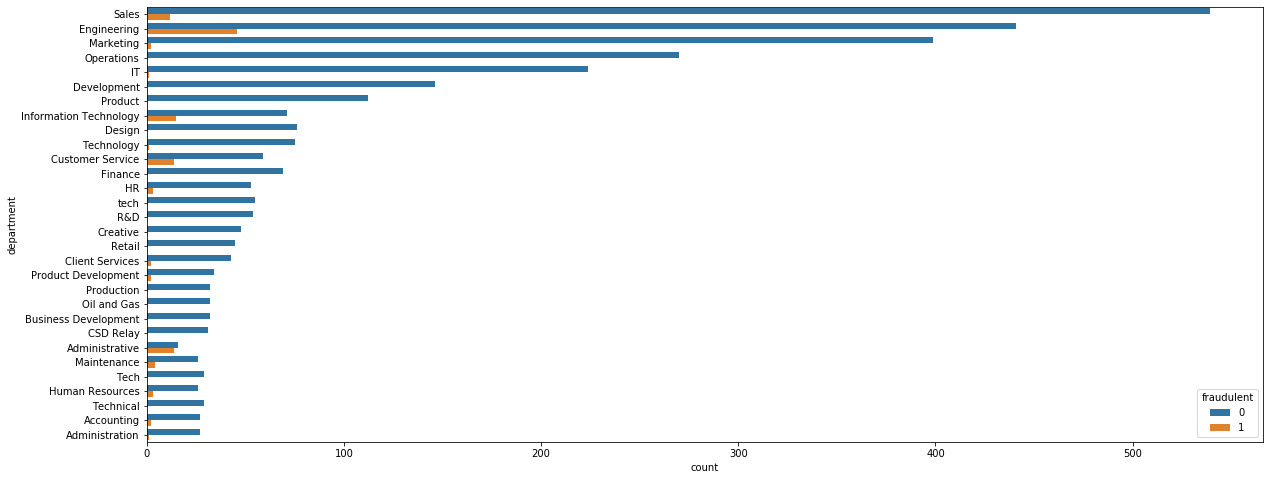

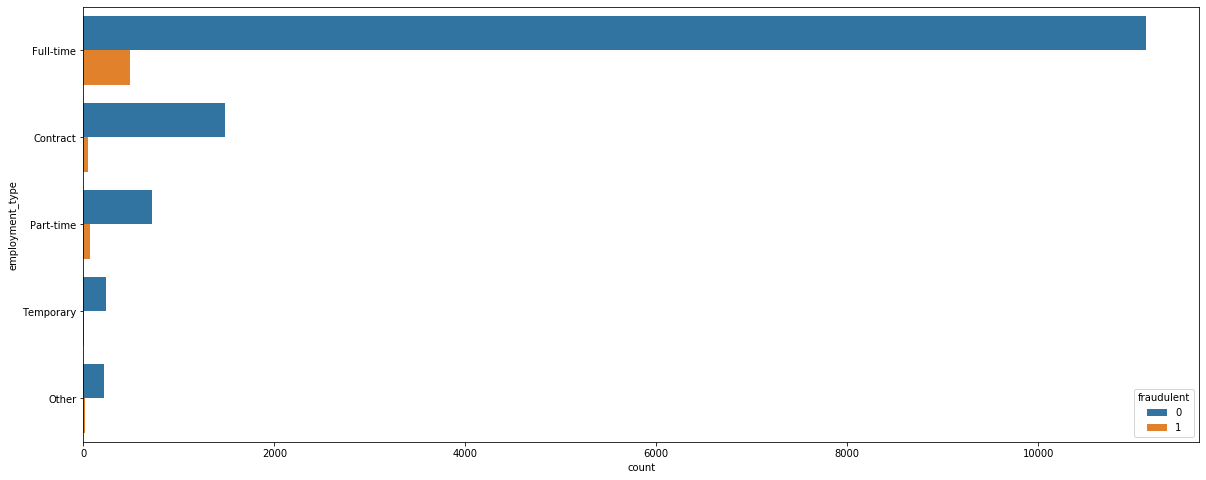

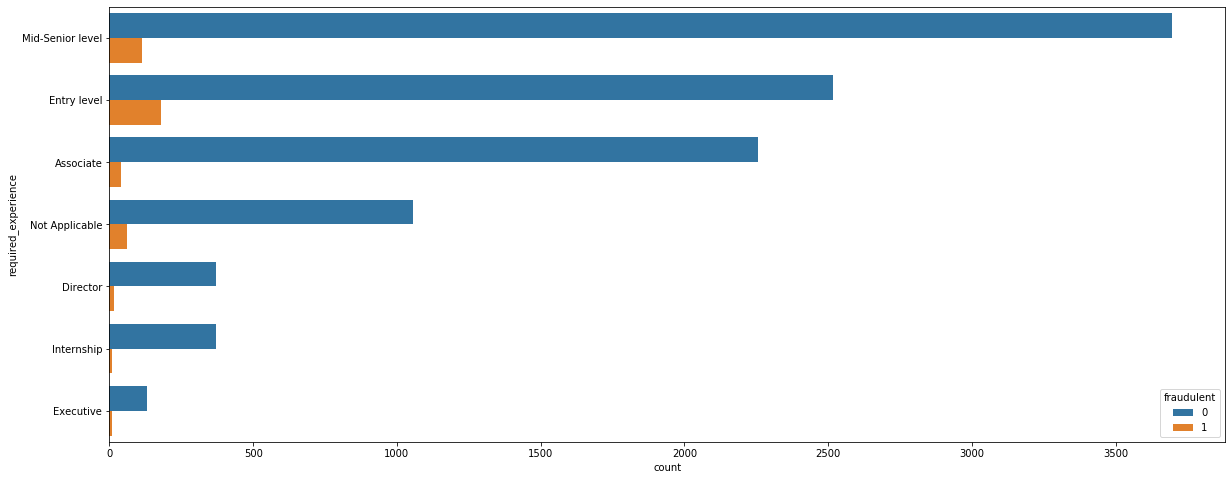

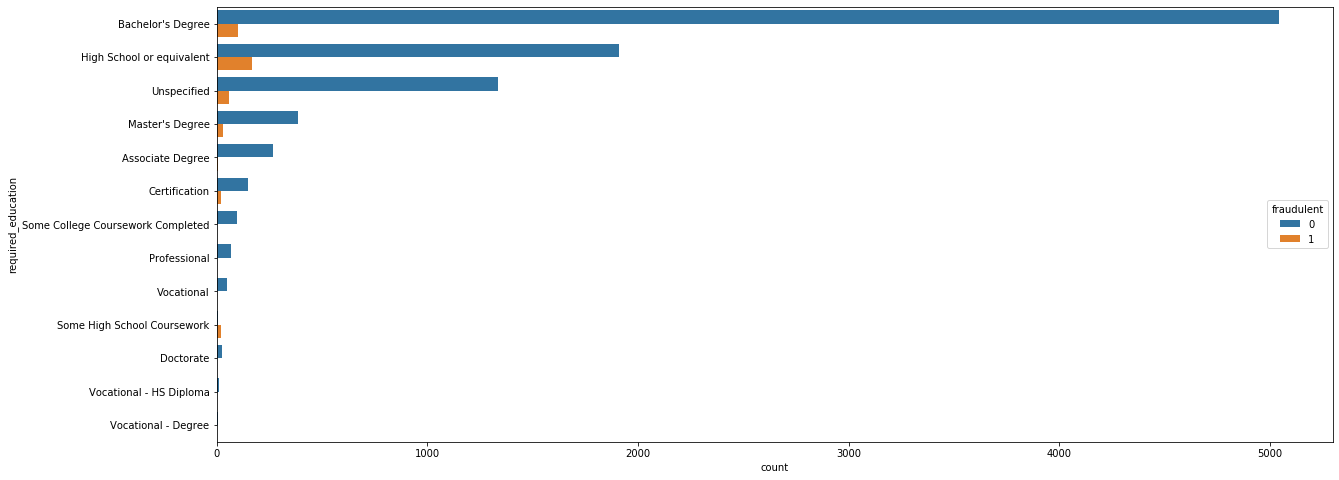

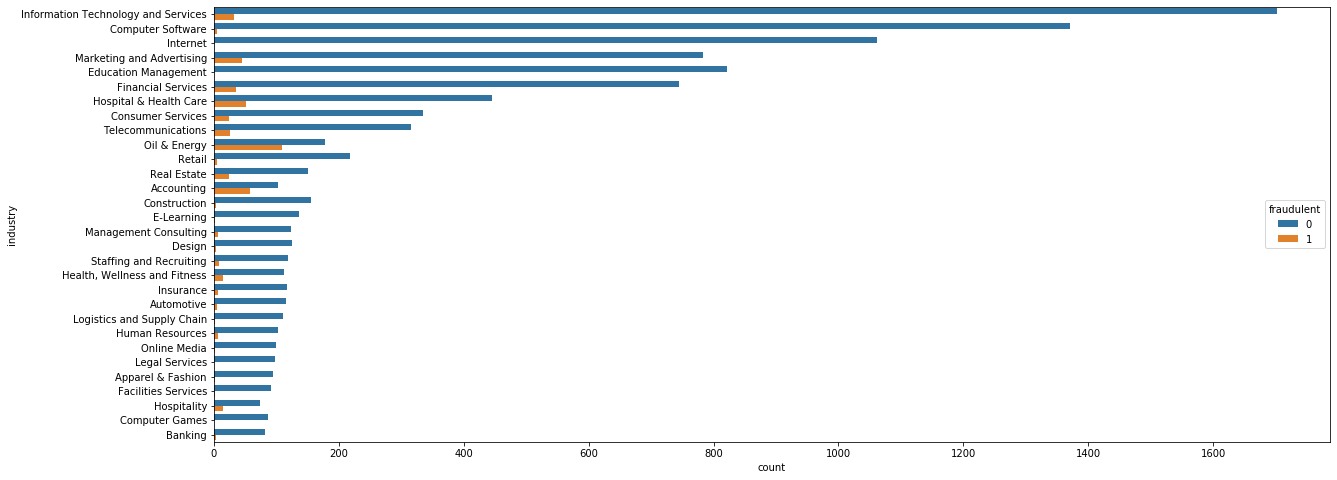

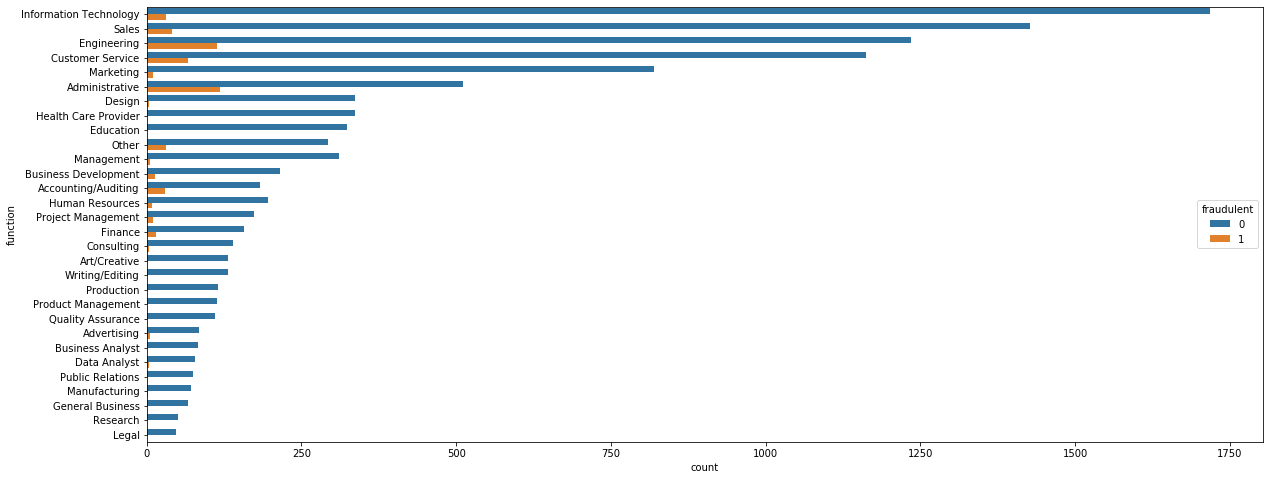

In [13]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="department",data=data_1,
                   order=data_1.department.value_counts().iloc[:30].index)

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="employment_type",data=data_1,
                   order=data_1.employment_type.value_counts().iloc[:30].index)

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.countplot(hue="fraudulent",y="required_experience",data=data_1,
                   order=data_1.required_experience.value_counts().iloc[:30].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="required_education",data=data_1,
                   order=data_1.required_education.value_counts().iloc[:30].index)
              
fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="industry",data=data_1,
                   order=data_1.industry.value_counts().iloc[:30].index)

fig, ax = plt.subplots(figsize=(20,8))              
ax = sns.countplot(hue="fraudulent",y="function",data=data_1,
                   order=data_1.function.value_counts().iloc[:30].index)


plt.show()

I will use wordclouds to visualize most common words in categorical columns which are whole sentences/paragraphs from fraudulent offers.

In [14]:
data_1 = data_1.loc[data_1["fraudulent"]==1]

In [15]:
from wordcloud import WordCloud, STOPWORDS

In [16]:
for value in data_1[["title","company_profile","description","requirements","benefits"]]:
    data_1[value]= data_1[value].astype(str, errors="ignore")

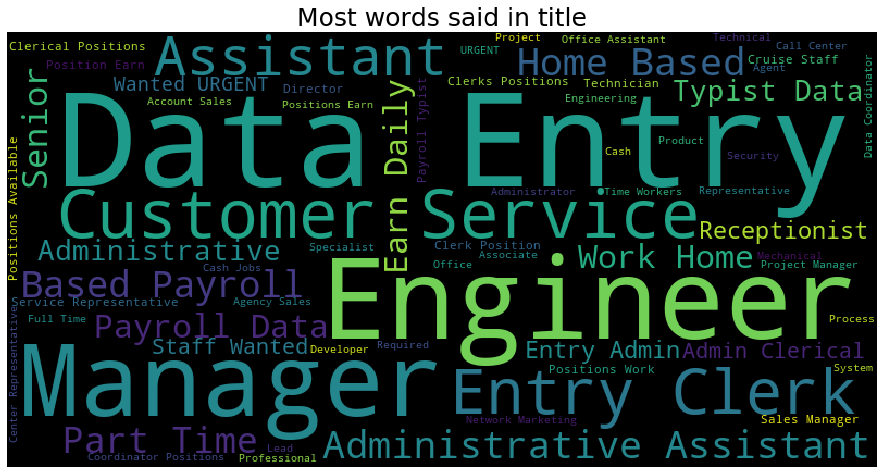

In [17]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["title"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in title", fontsize=25)
plt.show()

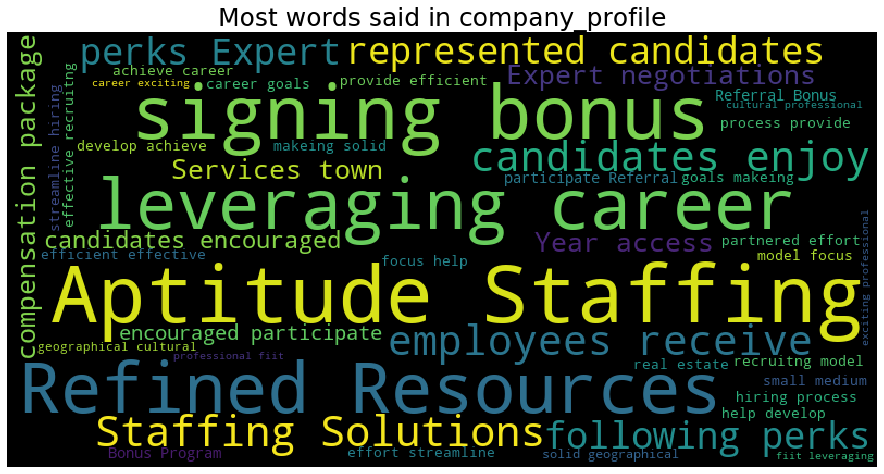

In [18]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["company_profile"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in company_profile", fontsize=25)
plt.show()

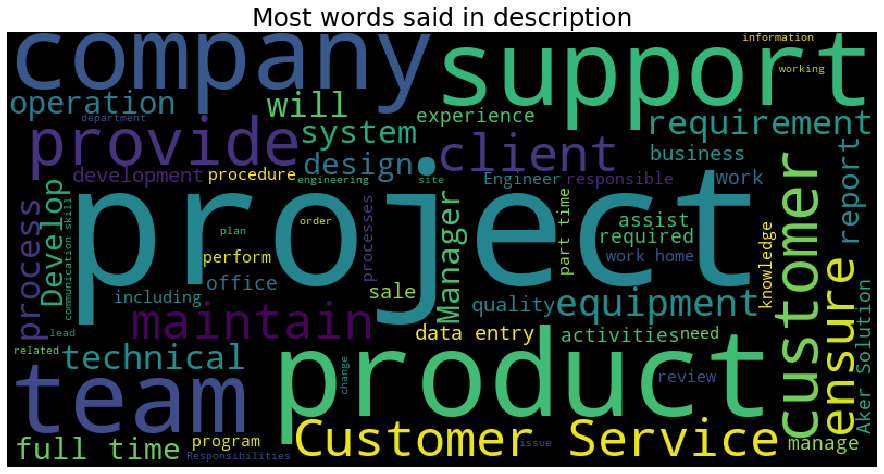

In [19]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10,max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["description"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in description", fontsize=25)
plt.show()

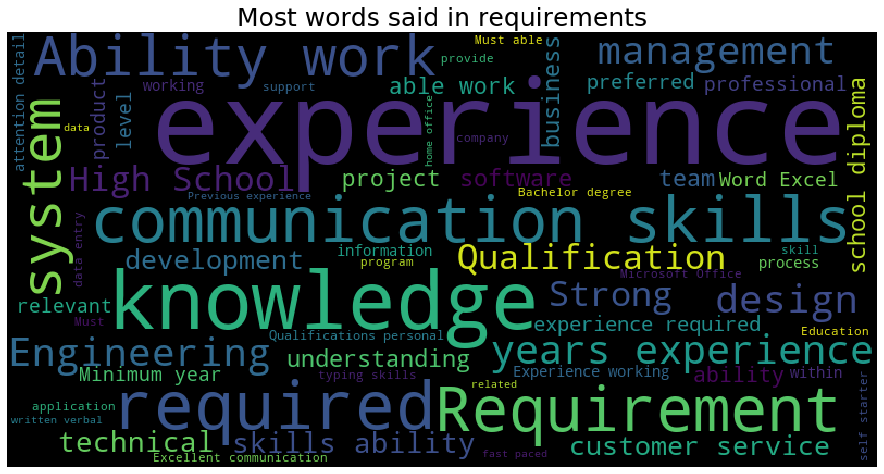

In [20]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10, max_words=150, 
                      repeat=False,min_word_length=4).generate(" ".join(data_1["requirements"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in requirements", fontsize=25)
plt.show()

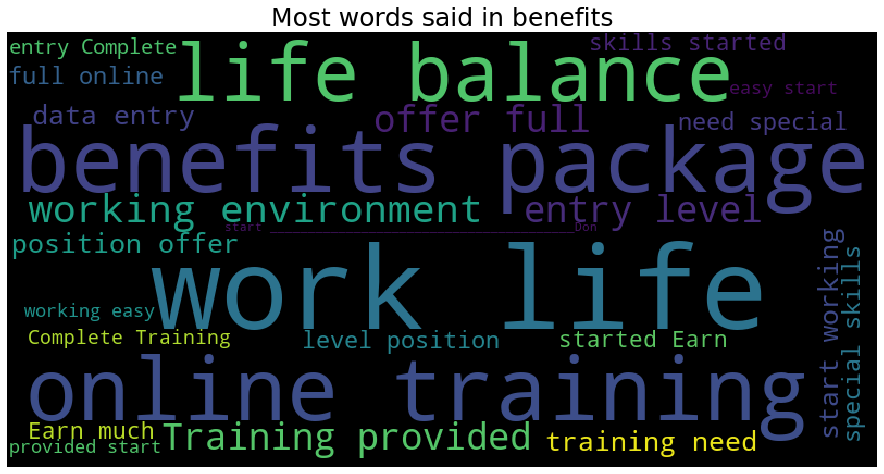

In [21]:
stopwords = STOPWORDS
wordcloud = WordCloud(width=800,height=400,stopwords=stopwords, min_font_size=10, max_words=150,
                      repeat=False,min_word_length=4).generate(" ".join(data_1["benefits"]))

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most words said in benefits", fontsize=25)
plt.show()

### One Hot Encoding for Categorical Columns and Logistic Regression

I will use One Hot Encoding to get dummies from most common words in categorical columns, which are not whole sentences/paragraphs, from fraudulent offers against real ones.

In [22]:
data_2 = data.copy()
data_2 = data_2.drop(["job_id"], axis = 1)

In [23]:
data_2.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [24]:
categorical_columns = ["employment_type", "required_experience", "required_education", "industry", "function"]

for column in categorical_columns:
    encoded = pd.get_dummies(data_2[column])
    data_2 = pd.concat([data_2, encoded], axis=1)
    
data_2.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,0,0,0,0,1,0,0,0,0,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
data_2.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [27]:
# Cargamos el modelo de Regresion Logistica
lr = LogisticRegression()

In [28]:
data_2.dtypes

title                object
location             object
department           object
salary_range         object
company_profile      object
                      ...  
Science               uint8
Strategy/Planning     uint8
Supply Chain          uint8
Training              uint8
Writing/Editing       uint8
Length: 210, dtype: object

#### REGRESION LOGÍSTICA 

In [29]:
# Split dataset in train/split
data_ma2 = data_2.drop(["title", "location", "department", "salary_range", "company_profile", "description", "requirements", "benefits"], axis = 1)
data_ma2.columns = ["".join (column if column.isalnum() else "_" for column in str(x)) for x in data_ma2.columns] 


for column in data_ma2.columns:
    data_ma2[column]= data_ma2[column].astype(float, errors="ignore")

x_train, x_test, y_train, y_test = train_test_split(data_ma2.drop(columns="fraudulent"), data_ma2["fraudulent"], test_size=0.2, random_state=42)

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [30]:
lr.fit(x_train, y_train)

ValueError: could not convert string to float: 'Sales'

In [ ]:
lr.score(x_test, y_test) #balancear

In [ ]:
predict = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict) #especifidad --> preferencia en indentificar los fraudes correctamente (minimizar los falsos positivos)

In [ ]:
# Conclusion Natural Language Processing

In [ ]:
y_train.head()

In [ ]:
data_ma2.head()

In [ ]:
data_ma2.corr()

### Create TF IDF Features

I will use TF IDF to count how frequent are words in categorical columns which are whole sentences/paragraphs or there is too much variability.

In [31]:
data_3 = data.copy()
data_3 = data_3.drop(["job_id"], axis = 1)

In [32]:
columns = ["title","company_profile","description","requirements","benefits"]
for column in columns:
    data_3[column] = data_3[column].fillna("")

def extract_features(data_3):    
    for column in columns:
        data_3[column+"_len"] = data_3[column].apply(lambda x : len(str(x)))
        data_3[column+"_wc"] = data_3[column].apply(lambda x : len(str(x.split())))
extract_features(data_3)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

data_3["combined_text"] = data_3["company_profile"] + " " + data_3["description"] + " " + data_3["requirements"] + " " + data_3["benefits"]

n_features = {
    "title" : 100,
    "combined_text" : 500
}

for column, n in n_features.items():
    tfidf = TfidfVectorizer(max_features=n, norm="l2", stop_words ="english")
    tfidf.fit(data_3[column])
    tfidf_train = np.array(tfidf.transform(data_3[column]).toarray(), dtype=np.float16)

    for word in range(n_features[column]):
        data_3[column + "_tfidf_" + str(word)] = tfidf_train[:, word]

In [34]:
data_3.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,combined_text_tfidf_490,combined_text_tfidf_491,combined_text_tfidf_492,combined_text_tfidf_493,combined_text_tfidf_494,combined_text_tfidf_495,combined_text_tfidf_496,combined_text_tfidf_497,combined_text_tfidf_498,combined_text_tfidf_499
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,...,0.0,0.0,0.000000,0.069458,0.092590,0.000000,0.0,0.000000,0.000000,0.000000
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,0.0,0.0,0.000000,0.030350,0.080872,0.068787,0.0,0.000000,0.000000,0.000000
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,...,0.0,0.0,0.078735,0.061859,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,0.0,0.0,0.000000,0.060822,0.000000,0.137817,0.0,0.037109,0.040436,0.025864
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,0.0,0.0,0.000000,0.023392,0.031174,0.000000,0.0,0.000000,0.000000,0.029831


In [35]:
data_3.dtypes

title                       object
location                    object
department                  object
salary_range                object
company_profile             object
                            ...   
combined_text_tfidf_495    float16
combined_text_tfidf_496    float16
combined_text_tfidf_497    float16
combined_text_tfidf_498    float16
combined_text_tfidf_499    float16
Length: 628, dtype: object

#### REGRESION LOGÍSTICA 

In [36]:
# Split dataset in train/split
data_ma3 = data_3.drop(["title", "location", "department", "salary_range", "company_profile", "description", "requirements", "benefits"], axis = 1)
data_ma3.columns = ["".join (column if column.isalnum() else "_" for column in str(x)) for x in data_ma3.columns] 


for column in data_ma3.columns:
    data_ma3[column]= data_ma3[column].astype(float, errors="ignore")

x_train, x_test, y_train, y_test = train_test_split(data_ma3.drop(columns="fraudulent"), data_ma3["fraudulent"], test_size=0.2, random_state=42)

In [37]:
lr.score(x_test, y_test) #balancear

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
predict = lr.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict) #especifidad --> preferencia en indentificar los fraudes correctamente (minimizar los falsos positivos)

In [ ]:
# Conclusion Natural Language Processing

In [ ]:
y_train.head()

In [ ]:
data_ma3.head()

In [ ]:
data_ma3.corr()